# Processamento Digital de Imagens (Digital image processing) : Trabalho 1

> FGA/UnB - Universidade de Brasilia
Semestre: 01/2020
Data de entrega: 09/09/2020

**Dados do aluno**
- Bruna Medeiros da Silva
- Matrícula: 16/0048711

## Importando bibliotecas

In [13]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 1. a

In [2]:
img_path = os.path.abspath('images/standard_test_images')
img_name = 'pirate.tif'
file = os.path.join(img_path, img_name)
img = cv.imread(file, 0)

In [3]:
img.shape

(512, 512)

In [4]:
print('Maximum value: %d\nMinimum value: %d' % (img.max(), img.min()))

Maximum value: 241
Minimum value: 36


## 1. b

### Using Matplotlib

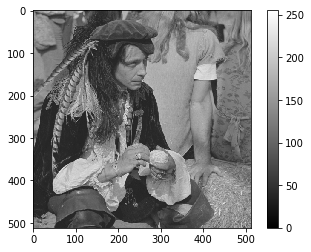

In [5]:
fig = plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.colorbar(fig)

### Using OpenCV

In [6]:
cv.imshow('1.b', img)
cv.waitKey(0)   
cv.destroyAllWindows()  

## 1. c

### 1. First attempt

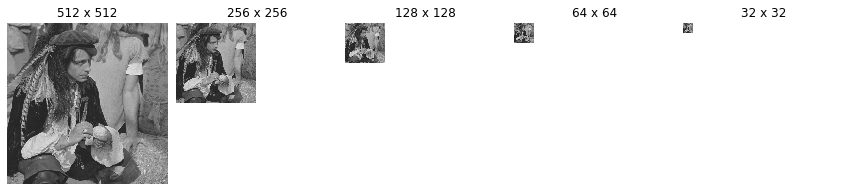

In [7]:
from matplotlib import gridspec

def downsample_512(img):    
    original_size = 512
    size = original_size
    
    img = cv.imread(file, 0)
    fig, axs = plt.subplots(1, 5, figsize=[15, 15])
    fig.subplots_adjust(wspace=0.05)
    
    axs[0].axis('off')
    axs[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255, interpolation='none')
    axs[0].set_title('%d x %d' % (size, size))
    
    for ax in axs[1:]:
        img[0 : int(size / 2), 0 : int(size / 2)] = img[0 : size : 2, 0 : size : 2]
        img[int(size / 2) : original_size, :] = 255
        img[:, int(size / 2) : original_size] = 255

        size = int(size / 2)
        
        ax.axis('off')
        ax.imshow(img, cmap = 'gray', vmin = 0, vmax = 255, interpolation='none')
        ax.set_title('%d x %d' % (size, size))        
        
        
downsample_512(img)

### 2. Second Attempt

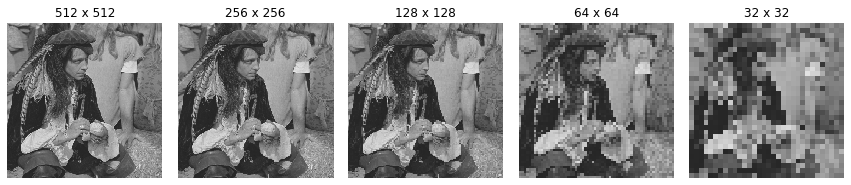

In [8]:
from matplotlib import gridspec

def downsample_512(img):    
    original_size = 512
    size = original_size
    images = {}
    idx = 0
    
    img = cv.imread(file, 0)
    fig, axs = plt.subplots(1, 5, figsize=[15, 15])
    fig.subplots_adjust(wspace=0.1)
    
    axs[0].axis('off')
    axs[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255, interpolation='none')
    axs[0].set_title('%d x %d' % (size, size))
    

    for ax in axs[1:]:
        img = img[0 : size : 2, 0 : size : 2]
        images[idx] = img
#         img[0 : int(size / 2), 0 : int(size / 2)] = img[0 : size : 2, 0 : size : 2]
#         img[int(size / 2) : original_size, :] = 255
#         img[:, int(size / 2) : original_size] = 255
        idx += 1
        size = int(size / 2)
        
        ax.axis('off')
        ax.imshow(img, cmap = 'gray', vmin = 0, vmax = 255, interpolation='none')
        ax.set_title('%d x %d' % (size, size))        
    return images
        
images = {}
images = downsample_512(img)


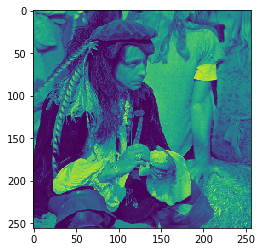

In [9]:
plt.imshow(images[0])

### 3. Third Attempt

In [10]:
def plot_original(img):
     # dots (pixels) per inch 
    dpi = int(os.popen('xdpyinfo | grep -w resolution | grep -Eo "[0-9]{1,}" | head -1').read())

    height, width = img.shape
    
    # With a screen with x pixels/inch and a image of y pixels
    # we need z = y/x [pixels/pixels/inch] = z inches to represent an image with its original size
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax  = fig.add_axes([0, 0, 1, 1]) 
    # Hide axis
    ax.axis('off')

    # Show final image
    ax.imshow(img, cmap='gray')

    plt.show()

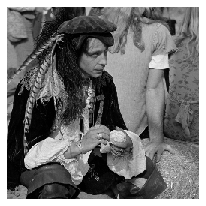

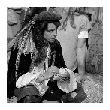

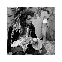

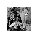

In [11]:
from matplotlib import gridspec

def downsample_512(img):    
    original_size = 512
    size = original_size
    
    for ax in range(5):
        img = img[0 : size : 2, 0 : size : 2]
        size = int(size / 2)
        plot_original(img)
        
downsample_512(img)

## 1. d
### Nearest Neighbours

Método usado para interpolação, regreção e classificação que se utiliza da teoria de que amostras espacialmente próximas tendem a conter informações parecidas.

Com isso, o método de interpolação dos k vizinhos mais próximos em imagens 2D utiliza o valor dos k pixels mais próximos (com uma menor distância espacial) para definir o valor do pixel em questão.

Essa distância utilizada no cálculo é a distância euclidiana.

Recomenda-se utilizar valores de k **ímpares**, para evitar "empates" no momento de definir o valor adequado. No geral, são utilizados valores de $k = \sqrt{N}$ ou $k = \log{N}$, onde N é o número de amostras que você possui.

#### Processo para definição de índices e valores

> Esse método de obtençao dos índices corretos para o algoritimo de k vizinhos mais próximos pode ser encontrado [aqui](https://www.imageeprocessing.com/2017/11/nearest-neighbor-interpolation.html)

## 1. e

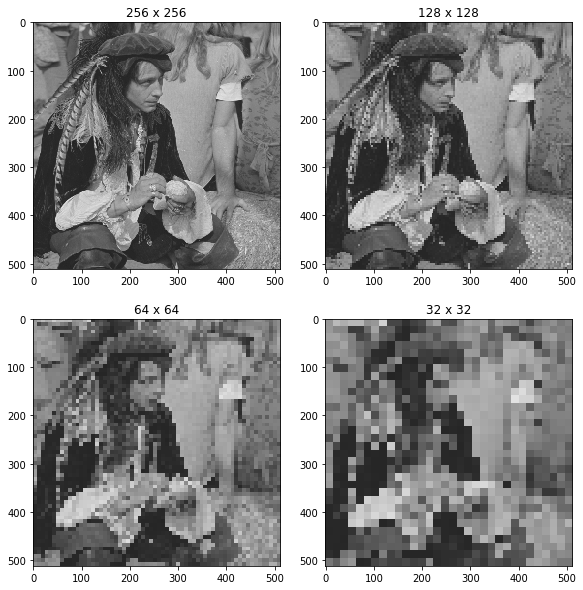

In [16]:
def knn_512(images):
    n_images = len(images)
    new_images = {}
    final_size = 512
    
    plot_row = 0
    plot_column = 0
    
    fig, axs = plt.subplots(2, round(n_images/2), figsize=[10, 10])
    fig.subplots_adjust(wspace=0.1)
    
    for idx in range(n_images):
        initial_size = len(images[idx])
        space = final_size / initial_size
        new_images_row = np.zeros([initial_size, final_size])
        new_images[idx] = np.zeros([final_size, final_size])

        new_images_idx = np.zeros([final_size, final_size])
        for row in range(initial_size):
            for column in range(final_size):
                new_images_idx[row][column] = int(column / space)
                new_images_row[row][column] = images[idx][row][int(new_images_idx[row][column])]

        new_images_idx = np.zeros([final_size, final_size])
        for column in range(final_size):
            for row in range(final_size):
                new_images_idx[row][column] = int(row / space)
                new_images[idx][row][column] = new_images_row[int(new_images_idx[row][column])][column]

#         axs[plot_row][plot_column].axis('off')
        axs[plot_row][plot_column].imshow(new_images[idx], cmap = 'gray', vmin = 0, vmax = 255, interpolation='none')
        axs[plot_row][plot_column].set_title('%d x %d' % (initial_size, initial_size))
        
        plot_column += 1
        if(plot_column == round(n_images/2)):
            plot_row += 1 
            plot_column = 0

    return new_images;
    
new_images = knn_512(images)